# ALMA WSU Size of Compute Estimate

The goal of this notebook is to revisit the size of compute estimate and update it to include concerns about a and w-project

## Getting everything set up

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable,Table, vstack
from importlib import reload
import astropy.units as u
import wsu_db
import wsu_plots
import tabulate

## Read in data files

In [69]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20231012.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20231012.ecsv')

In [70]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [71]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [72]:
band1_band2_rep = Table.read('data/wsu_datarates_mit_per_mous_band12_20231012.ecsv')

# calculate system performance for initial database

In [83]:
reload(wsu_db)
wsu_db.calc_sysperf(wsu_all,
                    label='allgrid',
                    mosaic_aproject=True,
                    wproject=True)

In [84]:
idx = (wsu_all['mosaic'] == 'T')
wsu_all[idx]['flops_per_vis_allgrid']

7472.8
7472.8
7472.8
7472.8
7472.8
7472.8
7472.8
7472.8
7472.8
7472.8
7472.8


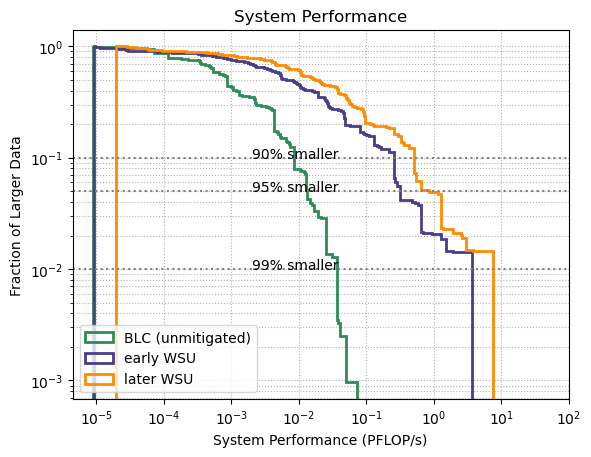

In [85]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all,label='allgrid')

In [86]:
# stats without aproject
reload(wsu_db)
mystats = Table(wsu_db.calc_wsu_sysperf_stats(wsu_all,label='allgrid'))
mystats['median'].format = "{:7.3g}"
mystats['wavg'].format="{:7.3g}"
mystats['max'].format="{:7.3g}"
mystats

stage,median,wavg,max
str8,float64,float64,float64
blc,0.000844,0.00335,0.0739
early,0.00667,0.124,3.74
later_2x,0.00896,0.136,3.74
later_4x,0.0179,0.271,7.48


In [88]:
reload(wsu_db)
wsu_db.calc_sysperf(wsu_all,
                    label='aprojonly',
                    mosaic_aproject=True,
                    wproject=False)

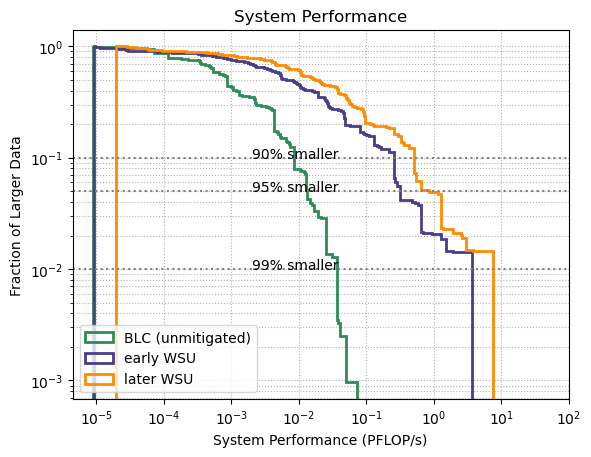

In [89]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all,label='aprojonly')
# no change here, but that's because there are no band 1 data sets in this sample.

In [90]:
# stats without w-project, but with aproject. no change because there are not band 1 data sets in this sample
mystats = Table(wsu_db.calc_wsu_sysperf_stats(wsu_all,label='aprojonly'))
mystats['median'].format = "{:7.3g}"
mystats['wavg'].format="{:7.3g}"
mystats['max'].format="{:7.3g}"
mystats

stage,median,wavg,max
str8,float64,float64,float64
blc,0.000844,0.00335,0.0739
early,0.00667,0.124,3.74
later_2x,0.00896,0.136,3.74
later_4x,0.0179,0.271,7.48


In [92]:
reload(wsu_db)
wsu_db.calc_sysperf(wsu_all,
                    label='wprojonly',
                    mosaic_aproject=False,
                    wproject=True)

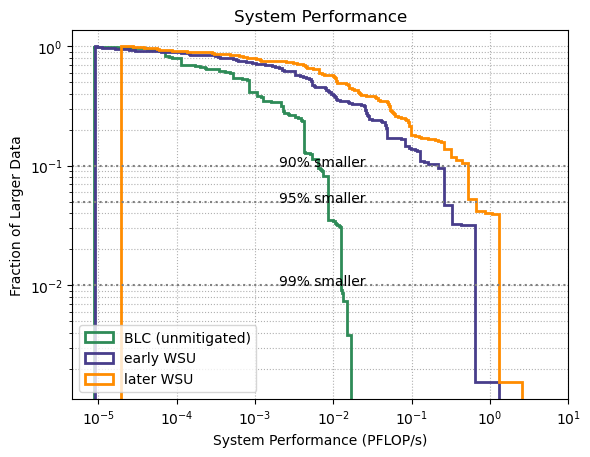

In [93]:
# no a-project, but wproject, but w-project has no effect because no band 1 data
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all,label='wprojonly')

In [94]:
# stats without w or a-project,
mystats = Table(wsu_db.calc_wsu_sysperf_stats(wsu_all,label='wprojonly'))
mystats['median'].format = "{:7.3g}"
mystats['wavg'].format="{:7.3g}"
mystats['max'].format="{:7.3g}"
mystats

stage,median,wavg,max
str8,float64,float64,float64
blc,0.000844,0.00201,0.0169
early,0.00534,0.0578,1.28
later_2x,0.00552,0.0671,1.28
later_4x,0.011,0.134,2.56


# calculate system performance for the database with band 1 and 2

In [95]:
reload(wsu_db)
wsu_db.calc_sysperf(band1_band2_rep,
                    label='allgrid',
                    mosaic_aproject=True,
                    wproject=True)

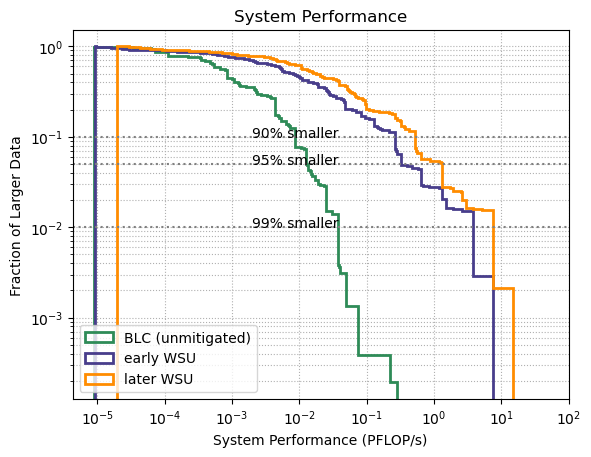

In [96]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(band1_band2_rep,label='allgrid')

In [98]:
idx = (band1_band2_rep['band'] == 1) & (band1_band2_rep['L80'] > 6200*u.m)
band1_band2_rep[idx]['flops_per_vis_allgrid','mosaic','band','L80']

flops_per_vis_allgrid,mosaic,band,L80
,,,m
float64,str1,float64,float64
21768.4,F,1.0,8001.667
21768.4,F,1.0,7526.7324
21768.4,F,1.0,6563.1826
21768.4,F,1.0,7118.579
21768.4,F,1.0,7354.163


In [99]:
np.max(band1_band2_rep['flops_per_vis_allgrid'])

21768.4

In [100]:
mystats = Table(wsu_db.calc_wsu_sysperf_stats(band1_band2_rep,label='allgrid'))
mystats['median'].format = "{:7.3g}"
mystats['wavg'].format="{:7.3g}"
mystats['max'].format="{:7.3g}"
mystats

stage,median,wavg,max
str8,float64,float64,float64
blc,0.000844,0.00333,0.287
early,0.008,0.139,7.48
later_2x,0.00986,0.149,7.48
later_4x,0.0171,0.287,15


In [101]:
reload(wsu_db)
wsu_db.calc_sysperf(band1_band2_rep,
                    label='aprojonly',
                    mosaic_aproject=True,
                    wproject=False)

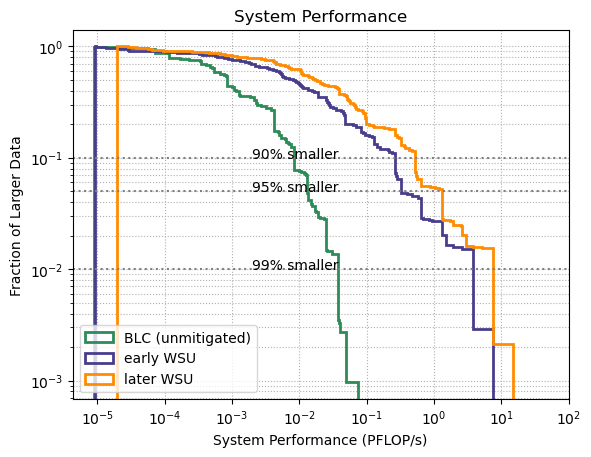

In [102]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(band1_band2_rep,label='aprojonly')

In [103]:
mystats = Table(wsu_db.calc_wsu_sysperf_stats(band1_band2_rep,label='aprojonly'))
mystats['median'].format = "{:7.3g}"
mystats['wavg'].format="{:7.3g}"
mystats['max'].format="{:7.3g}"
mystats

stage,median,wavg,max
str8,float64,float64,float64
blc,0.000844,0.00326,0.0739
early,0.008,0.139,7.48
later_2x,0.00986,0.149,7.48
later_4x,0.017,0.286,15


In [104]:
reload(wsu_db)
wsu_db.calc_sysperf(band1_band2_rep,
                    label='stdonly',
                    mosaic_aproject=False,
                    wproject=False)

not applying aproject or wproject


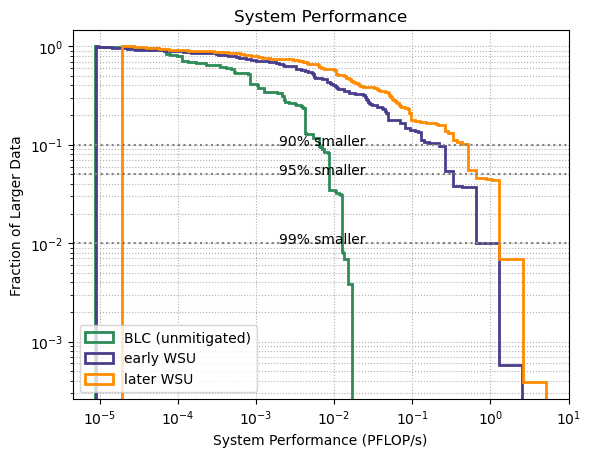

In [105]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(band1_band2_rep,label='stdonly')

In [106]:
mystats = Table(wsu_db.calc_wsu_sysperf_stats(band1_band2_rep,label='stdonly'))
mystats['median'].format = "{:7.3g}"
mystats['wavg'].format="{:7.3g}"
mystats['max'].format="{:7.3g}"
mystats

stage,median,wavg,max
str8,float64,float64,float64
blc,0.000844,0.00194,0.0169
early,0.00534,0.063,2.56
later_2x,0.00692,0.0713,2.56
later_4x,0.0134,0.137,5.13
